#PCA approch

step1:: standardize the data

step2:: obtain the eigenvectors and eigenvalues from the covariance and correlation matrix or perform singular value decomposition

step3:: sort eigen value in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dim of the new feature subspace

step4:: construct the projection matrix W from the selected k eigenvectors

step5:: transform the original dataset X via W to obtain a k-dim feature subspace Y

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

In [ ]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.columns=['sepal_len' , 'sepal_wid' , 'petal_len' , 'petal_wid' , 'class']
iris.dropna(how='all' , inplace=True)

In [ ]:
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.isnull().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
class        0
dtype: int64

In [ ]:
#splitting the data and class
X = iris.drop(columns='class',axis=1)
y= iris['class']

In [ ]:
X.head() , Y.head()

(   sepal_len  sepal_wid  petal_len  petal_wid
 0        5.1        3.5        1.4        0.2
 1        4.9        3.0        1.4        0.2
 2        4.7        3.2        1.3        0.2
 3        4.6        3.1        1.5        0.2
 4        5.0        3.6        1.4        0.2, 0    Iris-setosa
 1    Iris-setosa
 2    Iris-setosa
 3    Iris-setosa
 4    Iris-setosa
 Name: class, dtype: object)

#standardizing

In [ ]:

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

#Eigen composition

-the eigenvectors determine the direction of the new feature space,an the eigenvalues determine their magnitude

-in other words, the eigenvalues explain the variance of the data along the new feature axes


In [ ]:
#covariance matrix

mean_ve = np.mean(X_std , axis=0)
cov_mat = (X_std - mean_ve).T.dot ((X_std - mean_ve)) / (X_std.shape[0]-1)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
# to find the convariance matrix we could use the numpy fun also
np.cov(X_std.T)

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [ ]:
#now we perform an eigendecomposition on the covariance matrix

cov_amt = np.cov(X_std.T)
eig_val , eig_vecs = np.linalg.eig(cov_mat)

eig_val , eig_vecs

(array([2.93035378, 0.92740362, 0.14834223, 0.02074601]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

#Correlation matrix

-eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix.

In [ ]:
#Eigendecomposition of the standard data based on the correlation matrix

cor_mat1 = np.corrcoef(X_std.T)

eig_val , eig_vec = np.linalg.eig(cor_mat1)

eig_val , eig_vec

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

In [ ]:
#Eigen decomposition of the raw data based on the correaltion matrix

cor_mat2 = np.corrcoef(X.T)
eig_val , eig_vec = np.linalg.eig(cor_mat2)

eig_val , eig_vec

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

#singular value decomposition

-SVD is used to improve the computational efficieny

In [ ]:
u , s , v = np.linalg.svd(X_std.T)
u ,s , v

(array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
        [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
        [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
        [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]]),
 array([20.89551896, 11.75513248,  4.7013819 ,  1.75816839]),
 array([[ 1.08374515e-01,  9.98503796e-02,  1.13323362e-01, ...,
         -7.27833114e-02, -6.58701606e-02, -4.59092965e-02],
        [-4.30198387e-02,  5.57547718e-02,  2.70926177e-02, ...,
         -2.26960075e-02, -8.64611208e-02,  1.89567788e-03],
        [ 2.59377669e-02,  4.83370288e-02, -1.09498919e-02, ...,
         -3.81328738e-02, -1.98113038e-01, -1.12476331e-01],
        ...,
        [ 5.42576376e-02,  5.32189412e-03,  2.76010922e-02, ...,
          9.89545817e-01, -1.40226565e-02, -7.86338250e-04],
        [ 1.60581494e-03,  8.56651825e-02,  1.78415121e-01, ...,
         -1.24233079e-02,  9.52228601e-01, -2.19591161e-02],
        [ 2.27770498e-03,  6.44405862e-03,  1

#Selecting principal components

SORTING EIGENPAIRS

-as we know eigenvectors only define the directions of the new axis ,since they have all the same unot length 1 , which can be confiremed by the following line of code

In [ ]:
for ev in eig_vec.T:
  np.testing.assert_array_almost_equal(1.0,np.linalg.norm(ev))


In [ ]:
ev

array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627])

In [ ]:
#to decide which eigenvector can be dropped we need to find the eigenvector with lowest eigenvalues which bear the least info about the distribution of the data,those are the ones to be dropped
#make a list
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# Sort the tuple from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

#checking the sorted list is in decreasing order or not
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9108180837520528
0.9212209307072254
0.1473532783050958
0.020607707235624842


#Explained Variance

-how many PC are we going to choose for your new feature? ans: to do so we use "explained variace"

-explained variace can be calculated from the eigenvalues

-the explained variance tells us hoe much info(variance) can be attributed to each of the PC

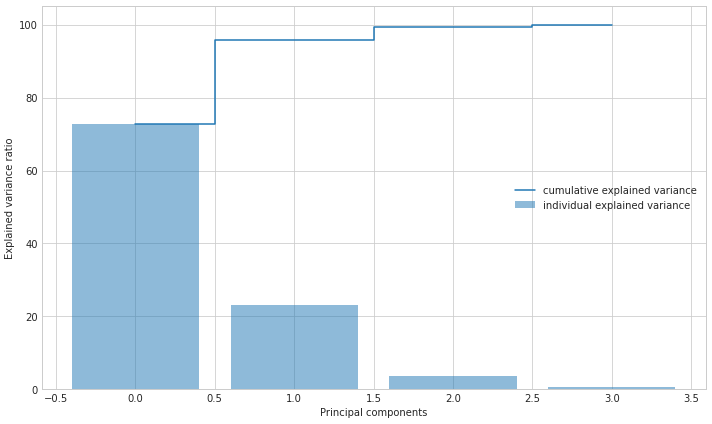

In [ ]:
tot = sum(eig_val)
var_exp = [(i / tot)*100 for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 6))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

- the above graph shows that most of the variance can be seen in the first PC and the second PC has some info while the third and the forth have a very low variance so 3rd adn 4rd can be dropped without losing much info

#Projection Matrix

-proj matrix is to be constructed which will be used to transform the data into new feature subspace

-proj matrix is basically just a matrix of our concantenated top eigenvectors

-In the below code we will reduce the 4-dim feature space to a 2-dim feature subsplace

-we will choose the top 2 eigenvector with the highest eigenvalues to construct our dim eigenvalue matrix W.


In [ ]:
matrix_W = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('matrix_W :\n', matrix_W)

matrix_W :
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


#Projection onto the new feature space

-we will use the 4*2-dim projection matirx W to transform samples onto the new subspace

-to do so we will use this eq, Y = X*W

-where Y is a 150*2 matrix


In [ ]:
Y = X_std.dot(matrix_W)

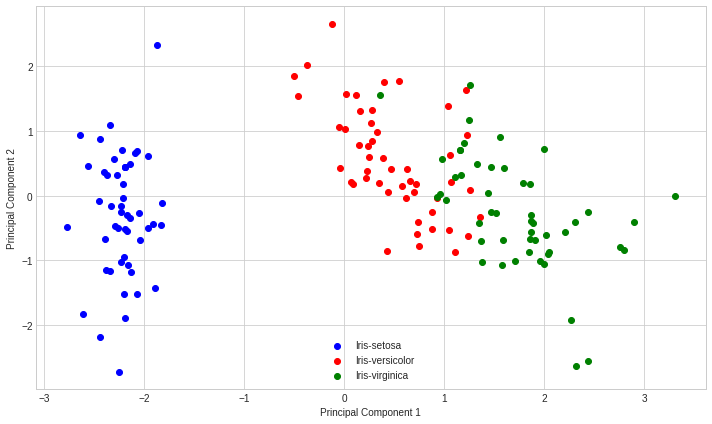

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 6))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

#Performing PCA using scikit-learn



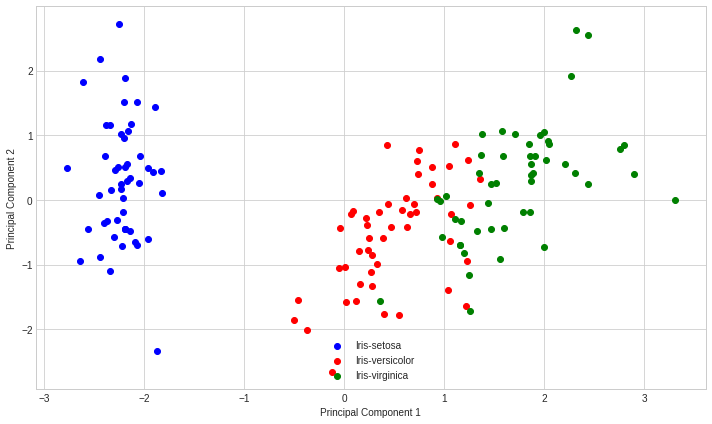

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 6))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()